# KMeans & DBSCAN Clustering on Iris Dataset
This notebook applies KMeans and DBSCAN Clustering algorithm on Iris dataset and compares the performance of the 2 algorithms. 

## KMeans 

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score

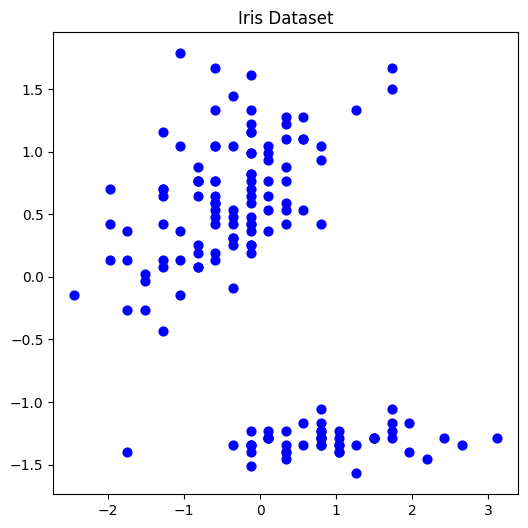

In [96]:
df = pd.read_csv("./Iris.csv",index_col= 'Id') # Load data

#Standardise features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
y = df['Species']


plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:,1], X_scaled[:,2], c='blue', marker='o', s=40)
plt.title('Iris Dataset')
plt.show()

KMeans Results
Silhouette Score: 0.4590
ARI: 0.6201


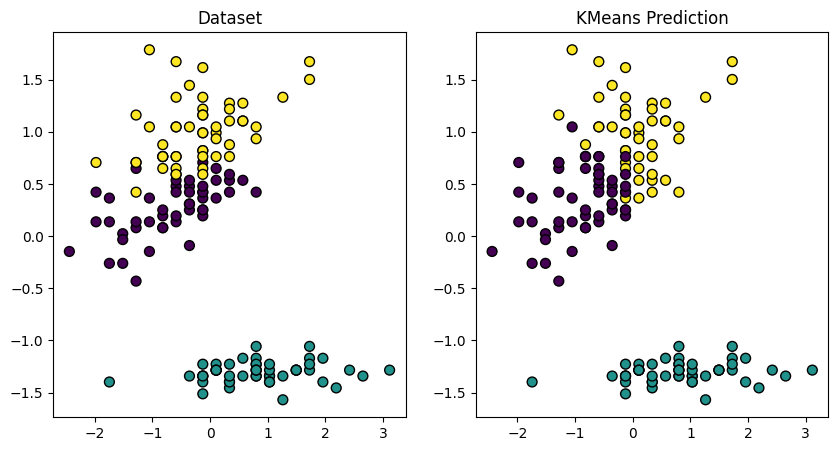

In [97]:
kmeans = KMeans(n_clusters=3, n_init= 20, max_iter= 300, tol=1e-4,random_state=0)
kmeans_y = kmeans.fit_predict(X_scaled)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (10,5))

#Map species to colours
species_to_color = {'Iris-setosa': 1, 'Iris-versicolor': 0, 'Iris-virginica': 2}
colors = df['Species'].map(species_to_color)
ax1.set_title("Dataset")
ax1.scatter(X_scaled[:, 1], X_scaled[:, 2], c=colors, marker='o', s=50, edgecolor='k')

ax2.set_title("KMeans Prediction")
ax2.scatter(X_scaled[:, 1], X_scaled[:, 2], c=kmeans_y, marker='o', s=50, edgecolor='k')

sil_score = silhouette_score(X_scaled,kmeans_y)
ari = adjusted_rand_score(y,kmeans_y)
print("KMeans Results")
print(f"Silhouette Score: {sil_score:.4f}")
print(f"ARI: {ari:.4f}")

The KMeans algorithm shows that it is able to group the 3 species in the data into 3 separate clusters, however there are a few data points that are misclassified near the border between 2 species.

##### Metrics:
**Silhouette Score (0.4590)**: A score of 0.4590 suggests a moderately good clustering, though it isn't perfect. Some data points do not fit well into their assigned cluster.

**Adjusted Rand Index (ARI) (0.6201)**: A score of 0.6201 indicates a moderate level of agreement between the KMeans clusters and the actual species. While there's a reasonable match, some misclassifications are present.

## DBSCAN


DBSCAN Evaluation Metrics (eps=0.25, min_samples=5):
Silhouette Score: 0.1064
ARI: 0.0374


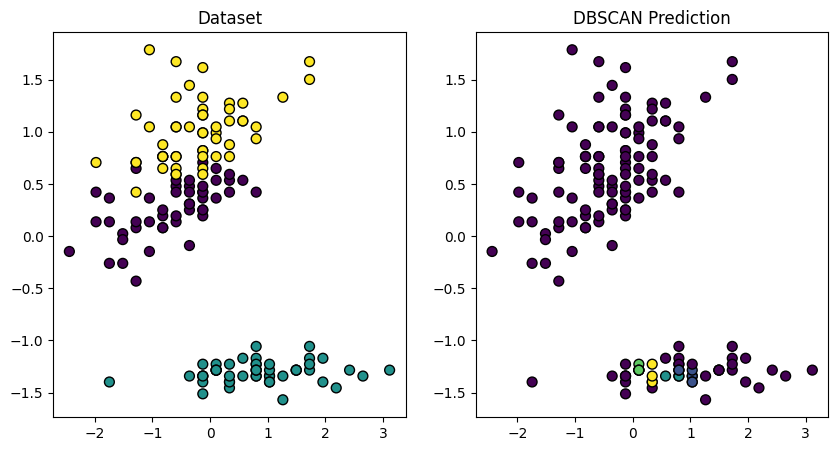

In [98]:
dbscan = DBSCAN(eps=0.25, min_samples=5) # Guess some values
dbscan_y = dbscan.fit_predict(X_scaled)


# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (10,5))

ax1.set_title("Dataset")
ax1.scatter(X_scaled[:, 1], X_scaled[:, 2], c=colors, marker='o', s=50, edgecolor='k')

ax2.set_title("DBSCAN Prediction")
ax2.scatter(X_scaled[:, 1], X_scaled[:, 2], c=dbscan_y, marker='o', s=50, edgecolor='k')

# Calculate Metrics
sil_score = silhouette_score(X_scaled, dbscan_y) 
ari = adjusted_rand_score(y, dbscan_y) 

# Print metrics
print(f"DBSCAN Evaluation Metrics (eps=0.25, min_samples=5):")
print(f"Silhouette Score: {sil_score:.4f}")
print(f"ARI: {ari:.4f}")

The initial guess for the hyperparameters was eps = 0.25 and min_samples = 5.

#### Metrics
**Silhouette Score (0.1064)**: This very low score suggests that many points are either poorly clustered or are assigned as noise. A silhouette score close to 0 indicates that the points might be lying on the boundary of clusters, leading to poor cohesion within clusters.

**Adjusted Rand Index (ARI) (0.0374)**: This very low ARI indicates almost no agreement between the DBSCAN clusters and the true species labels, meaning the clustering from DBSCAN doesn't align well with the known species.

## Hyperparameter Tuning
In order to improve the performance for DBSCAN, we will make using of hyperparameter tuning to adjust the values for eps and min_samples.
### Tuning Method
We performed a grid search over a finer range of `eps` and a smaller range of `min_samples`:
- **`eps_values`**: From `0.15` to `1.8` in increments of `0.05`
- **`min_samples_values`**: From `2` to `6`
#### Metrics:
- **Silhouette Score**: Higher values indicate better-defined clusters.
- **Adjusted Rand Index (ARI)**: Higher values indicate better alignment with the known species.

We can use a heatmap to visualize the effect of the parameters on our metrics, and choose the hyperparameters based on the highest ARI and Silhouette Scores.


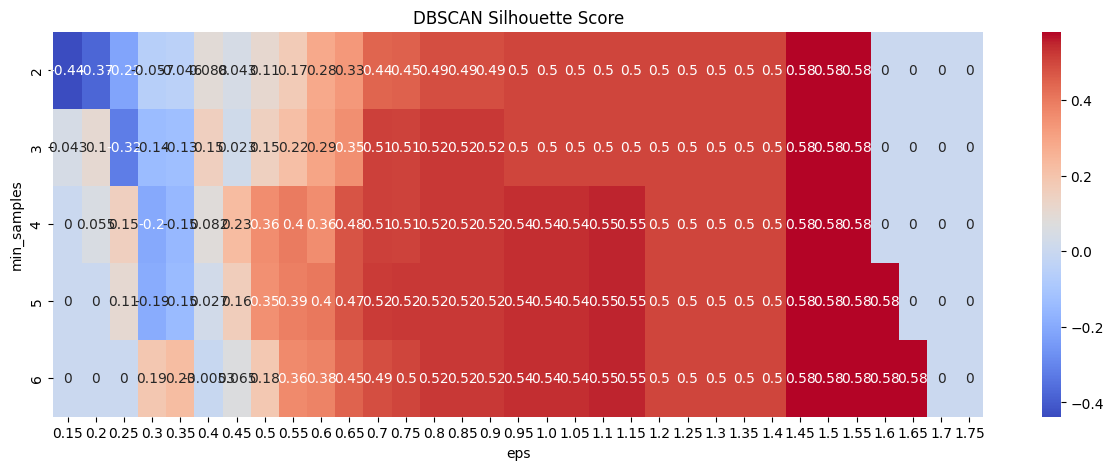

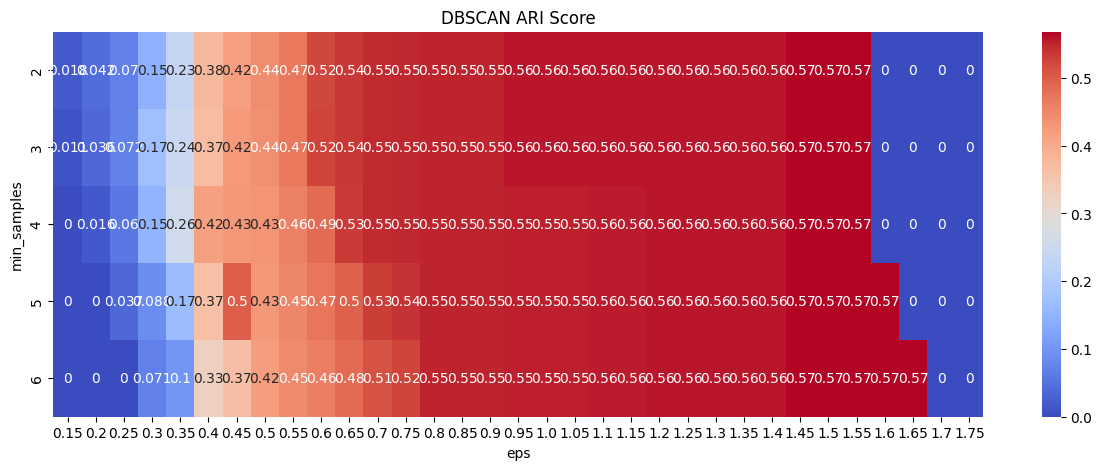



Best DBSCAN results with eps=1.4500000000000004, min_samples=2.0:
Silhouette Score: 0.5802
Adjusted Rand Index (ARI): 0.5681


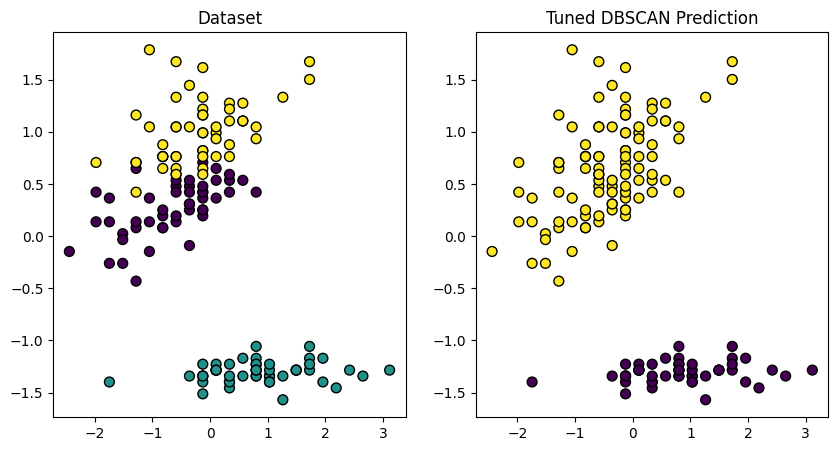

In [99]:
import numpy as np
import seaborn as sns

eps_vals = np.arange(0.15,1.8,0.05)
min_sample_vals = range(2,7)

metrics = []

for eps_ in eps_vals:
    for min_samples_ in min_sample_vals:
        dbscan = DBSCAN(eps=eps_, min_samples=min_samples_)
        dbscan_y = dbscan.fit_predict(X_scaled)

        if len(set(dbscan_y)) > 1:
            sil_score = silhouette_score(X_scaled,dbscan_y)
            ari = adjusted_rand_score(y,dbscan_y)
            metrics.append((eps_,min_samples_,sil_score,ari))
metrics = np.array(metrics)

## Sil Score Heatmap
plt.figure(figsize=(15,5))
heatmap = np.zeros((len(min_sample_vals),len(eps_vals)))
for i, min_samples in enumerate(min_sample_vals):
    for j, eps in enumerate(eps_vals):
        match = metrics[(metrics[:, 0] == eps) & (metrics[:, 1] == min_samples)]
        if len(match) > 0:
            heatmap[i, j] = match[0, 2]

sns.heatmap(heatmap, xticklabels=np.round(eps_vals, 2), yticklabels=min_sample_vals, annot=True, cmap='coolwarm')
plt.title('DBSCAN Silhouette Score')
plt.xlabel('eps')
plt.ylabel('min_samples')
plt.show()
print("\n")
## 

## ARI Heatmap
plt.figure(figsize=(15,5))
heatmap = np.zeros((len(min_sample_vals),len(eps_vals)))
for i, min_samples in enumerate(min_sample_vals):
    for j, eps in enumerate(eps_vals):
        match = metrics[(metrics[:, 0] == eps) & (metrics[:, 1] == min_samples)]
        if len(match) > 0:
            heatmap[i, j] = match[0, 3]

sns.heatmap(heatmap, xticklabels=np.round(eps_vals, 2), yticklabels=min_sample_vals, annot=True, cmap='coolwarm')
plt.title('DBSCAN ARI Score')
plt.xlabel('eps')
plt.ylabel('min_samples')
plt.show()
print("\n")
## 

## Get best parameters by highest metric scores
best = metrics[:,3].argmax()
best_eps, best_min_samples, best_sil, best_ari = metrics[best]

# Print best parameter combination and evaluation metrics
print(f"Best DBSCAN results with eps={best_eps}, min_samples={best_min_samples}:")
print(f"Silhouette Score: {best_sil:.4f}")
print(f"Adjusted Rand Index (ARI): {best_ari:.4f}")

#Plot tuned DBSCAN
dbscan_best = DBSCAN(eps=best_eps, min_samples=int(best_min_samples))
best_dbscan_y = dbscan_best.fit_predict(X_scaled)
# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (10,5))

ax1.set_title("Dataset")
ax1.scatter(X_scaled[:, 1], X_scaled[:, 2], c=colors, marker='o', s=50, edgecolor='k')

ax2.set_title("Tuned DBSCAN Prediction")
ax2.scatter(X_scaled[:, 1], X_scaled[:, 2], c=best_dbscan_y, marker='o', s=50, edgecolor='k')


### Hyperparameter Tuning Results
By performing a grid search over eps and min_samples, we were able to achieve significant improvements in the performance of DBSCAN algorithm. 

**Silhouette Score (0.1064) -> (0.5802)**

**Adjusted Rand Index (ARI) (0.0374)-> (0.5681)**

#### Analysis
- In the heatmap for Silhouette Score, we observe that the highest Silhouette Scores **(0.5802)** are achieved for larger eps value (1.45-1.6). The size of min_sample does not appear to have significant impact on Silhoutte Score.
- In the heatmap for ARI, there is a similar relationship between eps and ARI, as the ARI improves as eps increases, to a maximu, of **(0.5681)** at eps = 1.45. The size of min_samples also does not appear to significantly impact ARI.

**Initial Parameters** : eps = 0.25, min_samples = 5,**Silhouette Score = 0.1064, Adjusted Rand Index (ARI) = 0.0374**

**Tuned Parameters** : eps = 1.45, min_samples = 2,**Silhouette Score = 0.5802, Adjusted Rand Index (ARI) = 0.5681**

The initial guess for the hyperparameters produced poorly clustered data that had almost no agreement with the known species labels. While tuning process resulted in significant improvements in the DBSCAN clustering performance, it is still only moderately successful and produces results comparable to KMeans Clustering.


# Comparison
## KMeans:
- **Silhouette Score : 0.4590**
- **Adjusted Rand Index (ARI) : 0.6201**
## DBSCAN:
- **Silhouette Score : 0.5802**
- **Adjusted Rand Index (ARI): 0.5681**
## Conclusion
- K-Means tends to work well when the data is well-separated and evenly distributed like the Iris Dataset.
- DBSCAN is better suited for datasets with irregular shapes or varying densities. DBSCAN achieved better clustering but had a lower accuracy in labelling the clusters.

